http://bigdataexaminer.com/data-science/understanding-bias-and-variance-using-python/

http://clic.cimec.unitn.it/fabio/wcpr13/celli_wcpr13.pdf

Good Paper on Centrality Metrics:
    http://www.analytictech.com/networks/centrali.htm

Normalized betweenness divides simple betweenness by its maximum value.""

------------------------------------------------
https://en.wikipedia.org/wiki/Betweenness_centrality

Note that the betweenness centrality of a node scales with the number of pairs of nodes as implied by the summation indices. Therefore the calculation may be rescaled by dividing through by the number of pairs of nodes not including v, so that g \in [0,1]. The division is done by (N-1)(N-2) for directed graphs and (N-1)(N-2)/2 for undirected graphs, where N is the number of nodes in the giant component. Note that this scales for the highest possible value, where one node is crossed by every single shortest path. This is often not the case, and a normalization can be performed without a loss of precision
\mbox{normal}(g(v)) = \frac{g(v) - \min(g)}{\max(g) - \min(g)}
which results in:
\max(normal) = 1
\min(normal) = 0
Note that this will always be a scaling from a smaller range into a larger range, so no precision is lost.

# Luther Problem Statement
Source: https://github.com/thisismetis/nyc16_ds7/tree/master/projects/02-luther

Back story:

Using information we scrape from the web, can we build linear regression models from which we can learn about the movie industry?

Data:

acquisition: web scraping
storage: flat files
sources: Box Office Mojo, The Numbers, any other publicly available information
Skills:

basics of the web (requests, HTML, CSS, JavaScript)
web scraping
numpy and pandas
statsmodels, scikit-learn
Analysis:

linear regression
Deliverable/communication:

organized project repository
slide presentation
visual and oral communication in presentations
write-up of process and results
Design:

iterative design process
scoping
"MVP"s and building outward
More information:

We'll learn about web scraping using two popular tools - BeautifulSoup and Selenium. You'll have to know the very basics of HTML. We'll also be evolving the way we use IPython notebooks—during this project we'll begin to use the notebook as a development scratchpad, where we test things out through interactive scripting, but then solidify our work in python modules with reusable functions and classes.

We'll practice using linear regression. We'll have a first taste of feature selection, this time based on our intuition and some trial and error, and we'll build and refine our models.

We'll work in groups for brainstorming and design, and code sharing will be highly encouraged, but the final projects will be individual.

This project will really give you the freedom to challenge yourself, no matter your skill level. Find your boundaries, meet them, and push them a little further.

We are very excited to see what you will learn and do for Project Luther!

# Luther Project Summary Statement
Here I describe where I got my data. What my hypothesis is all about
Introduction explaining the study and source of the day. And what terms mean

# Background Information on Variables

http://research.microsoft.com/pubs/163535/FacebookPersonality_michal_29_04_12.pdf

# Import Data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import cross_validation
from sklearn import preprocessing as pp


In [2]:
!ls mypersonality_final/

celli-al_wcpr13.pdf     mypersonality_final.csv readme.txt


In [3]:
df_raw = pd.read_csv('mypersonality_final/mypersonality_final.csv')

In [4]:
df_raw.shape

(9917, 20)

?? What do these terms really mean?
### - Is betweenness the real variable and nbetweenness somehow normed -- 
This suggests that it might be "normed betweenness"
https://books.google.com/books?id=vCeNPFiTCFIC&pg=PA336&lpg=PA336&dq=%22BETWEENNESS%22,+%22NBETWEENNESS%22&source=bl&ots=PvGsyRcO4z&sig=P_JskoyCIB31Iz-4Qr2wdjOnaSY&hl=en&sa=X&ved=0ahUKEwiN3u6syp7MAhVB0h4KHUurA-gQ6AEIHzAA#v=onepage&q=%22BETWEENNESS%22%2C%20%22NBETWEENNESS%22&f=false


In [5]:
df_grouped = df_raw.groupby(by = "#AUTHID", as_index = False).first()
df_grouped.describe()

,sEXT,sNEU,sAGR,sCON,sOPN,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
count,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,3.292120,2.627240,3.600320,3.522920,4.07856,408.012000,128936.801920,93.980960,0.033760,131342.232000,0.488320,0.138600
std,0.861368,0.776835,0.670758,0.740211,0.57506,316.636458,204807.609367,7.080237,0.036009,207014.930192,0.015587,0.113439
min,1.330000,1.250000,1.650000,1.450000,2.25000,24.000000,185.710000,31.210000,0.000000,241.000000,0.320000,0.000000
25%,2.662500,2.000000,3.150000,3.000000,3.75000,175.000000,14062.350000,93.260000,0.010000,14576.250000,0.490000,0.060000
50%,3.300000,2.590000,3.660000,3.500000,4.15000,315.000000,46636.100000,96.020000,0.020000,48358.000000,0.490000,0.110000
75%,4.000000,3.150000,4.100000,4.050000,4.50000,556.500000,145483.000000,97.807500,0.040000,152115.750000,0.500000,0.180000
max,5.000000,4.750000,5.000000,5.000000,5.00000,1596.000000,1251780.000000,99.820000,0.400000,1263790.000000,0.500000,0.630000


# Extracting some time series

In [82]:
x_extroversion = df_grouped["sEXT"]
x_neuroticism = df_grouped["sNEU"]
x_agreeableness = df_grouped["sAGR"]
x_conscientiousness = df_grouped["sCON"]
x_openness = df_grouped["sOPN"]

y_betweenness = df_grouped["BETWEENNESS"]
y_nbetweenness = df_grouped["NBETWEENNESS"]

network_size = df_grouped["NETWORKSIZE"]

variable_list = [x_extroversion,x_neuroticism,x_agreeableness,x_conscientiousness,x_openness]

# List of Basic Models

In [85]:
X_big5 = pd.DataFrame([x_extroversion,x_neuroticism,x_agreeableness,x_conscientiousness,x_openness]).T
X_network = pd.DataFrame([network_size]).T
X_big5_and_network = pd.DataFrame([x_extroversion,x_neuroticism,x_agreeableness,x_conscientiousness,x_openness,network_size]).T
X_big5_and_network_betweenness = pd.DataFrame([x_extroversion,x_neuroticism,x_agreeableness,x_conscientiousness,x_openness,network_size,y_betweenness]).T

# Creating some useful scatterplots

<function matplotlib.pyplot.show>

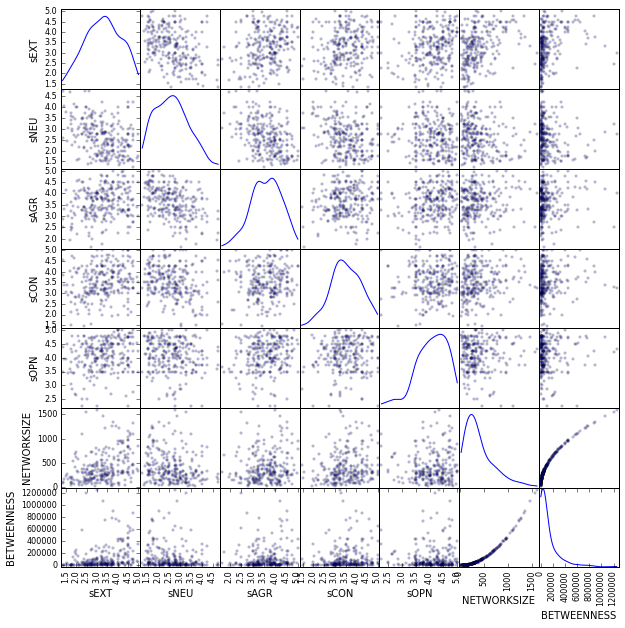

In [86]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(X_big5_and_network_betweenness, alpha=0.2, figsize=(10,10), diagonal='kde')
plt.show

## Create a function which does a "polynomial expansion" for all the individual features

In [8]:
def PolynomialFeatures_labeled(input_df,power,bias):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 
    
    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)
    bias = whether or not to include a bias/constant term in the begining
    
    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe   
    '''
    poly = pp.PolynomialFeatures(power,include_bias=bias)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    #print input_feature_names
    
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            #print "This is the input:", input_feature_names[i]
            if feature_distillation[i] == 0:
                continue            
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                    #final_label = final_label.replace("^1^1","^1")                    
                else:
                    final_label = final_label + " x " + intermediary_label
                    #final_label = final_label.replace("^1^1","^1")
            #print "This is the output:", final_label

        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

# Generate expanded models

In [9]:
X_big5.head()

,sEXT,sNEU,sAGR,sCON,sOPN
0,1.90,4.15,3.15,4.65,3.45
1,2.05,4.00,2.20,2.20,3.75
2,3.84,3.55,2.85,4.32,3.45
3,3.20,3.60,3.85,4.35,4.80
4,2.85,2.35,3.35,4.70,3.35


In [10]:
# THis has to come first otherwise the constant term will get duplicated
X_big5_polyexpanded = PolynomialFeatures_labeled(X_big5,2,bias = True)
X_network_polyexpanded =  PolynomialFeatures_labeled(X_network,2,bias = True)
X_big5_and_network_polyexpanded =  PolynomialFeatures_labeled(X_big5_and_network,2,bias = True)

# The reason I'm recreating these with polynomial expansion is just so it will have consistent feature names with the others
X_big5= PolynomialFeatures_labeled(X_big5,1,bias = True)
X_network=  PolynomialFeatures_labeled(X_network,1,bias = True)
X_big5_and_network =  PolynomialFeatures_labeled(X_big5_and_network,1,bias = True)


#target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X_big5`.columns,p) for p in poly.powers_]]
#output_df = pd.DataFrame(output_nparray, columns = target_feature_names)


In [11]:
list_of_model_names = [
                        'X_big5',
                        'X_big5_polyexpanded',
                        'X_network',
                        'X_network_polyexpanded',
                        'X_big5_and_network',
                        'X_big5_and_network_polyexpanded']

In [12]:
X_big5_polyexpanded.head()

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,sEXT^2,sEXT^1 x sNEU^1,sEXT^1 x sAGR^1,sEXT^1 x sCON^1,...,sNEU^2,sNEU^1 x sAGR^1,sNEU^1 x sCON^1,sNEU^1 x sOPN^1,sAGR^2,sAGR^1 x sCON^1,sAGR^1 x sOPN^1,sCON^2,sCON^1 x sOPN^1,sOPN^2
0,1,1.90,4.15,3.15,4.65,3.45,3.6100,7.8850,5.9850,8.8350,...,17.2225,13.0725,19.2975,14.3175,9.9225,14.6475,10.8675,21.6225,16.0425,11.9025
1,1,2.05,4.00,2.20,2.20,3.75,4.2025,8.2000,4.5100,4.5100,...,16.0000,8.8000,8.8000,15.0000,4.8400,4.8400,8.2500,4.8400,8.2500,14.0625
2,1,3.84,3.55,2.85,4.32,3.45,14.7456,13.6320,10.9440,16.5888,...,12.6025,10.1175,15.3360,12.2475,8.1225,12.3120,9.8325,18.6624,14.9040,11.9025
3,1,3.20,3.60,3.85,4.35,4.80,10.2400,11.5200,12.3200,13.9200,...,12.9600,13.8600,15.6600,17.2800,14.8225,16.7475,18.4800,18.9225,20.8800,23.0400
4,1,2.85,2.35,3.35,4.70,3.35,8.1225,6.6975,9.5475,13.3950,...,5.5225,7.8725,11.0450,7.8725,11.2225,15.7450,11.2225,22.0900,15.7450,11.2225


In [13]:
X_big5_polyexpanded.head()

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,sEXT^2,sEXT^1 x sNEU^1,sEXT^1 x sAGR^1,sEXT^1 x sCON^1,...,sNEU^2,sNEU^1 x sAGR^1,sNEU^1 x sCON^1,sNEU^1 x sOPN^1,sAGR^2,sAGR^1 x sCON^1,sAGR^1 x sOPN^1,sCON^2,sCON^1 x sOPN^1,sOPN^2
0,1,1.90,4.15,3.15,4.65,3.45,3.6100,7.8850,5.9850,8.8350,...,17.2225,13.0725,19.2975,14.3175,9.9225,14.6475,10.8675,21.6225,16.0425,11.9025
1,1,2.05,4.00,2.20,2.20,3.75,4.2025,8.2000,4.5100,4.5100,...,16.0000,8.8000,8.8000,15.0000,4.8400,4.8400,8.2500,4.8400,8.2500,14.0625
2,1,3.84,3.55,2.85,4.32,3.45,14.7456,13.6320,10.9440,16.5888,...,12.6025,10.1175,15.3360,12.2475,8.1225,12.3120,9.8325,18.6624,14.9040,11.9025
3,1,3.20,3.60,3.85,4.35,4.80,10.2400,11.5200,12.3200,13.9200,...,12.9600,13.8600,15.6600,17.2800,14.8225,16.7475,18.4800,18.9225,20.8800,23.0400
4,1,2.85,2.35,3.35,4.70,3.35,8.1225,6.6975,9.5475,13.3950,...,5.5225,7.8725,11.0450,7.8725,11.2225,15.7450,11.2225,22.0900,15.7450,11.2225


In [14]:
# This is a dictionary of the models. The keys are the names of the models and the values are the dataframe / 
#X matricies appropriate to them

dictionary_of_models_x_matricies = {"X_big5":X_big5,
                        "X_big5_polyexpanded":X_big5_polyexpanded,
                        "X_network":X_network,
                        "X_network_polyexpanded":X_network_polyexpanded,
                        "X_big5_and_network":X_big5_and_network,
                        "X_big5_and_network_polyexpanded":X_big5_and_network_polyexpanded,
                       }

# Clean Data as Necesesary

# Summary Statistics & Descriptive Visualizations (Pandas and Matplotlib, etc)

### Plot network size

### Printing the covaraiance matrix

In [15]:
X_big5_and_network.corr()

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,NETWORKSIZE^1
Constant Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sEXT^1,NaN,1.000000,-0.377248,0.205420,0.200926,0.203027,0.362139
sNEU^1,NaN,-0.377248,1.000000,-0.420796,-0.234329,-0.135144,-0.180202
sAGR^1,NaN,0.205420,-0.420796,1.000000,0.099657,0.179662,0.111331
sCON^1,NaN,0.200926,-0.234329,0.099657,1.000000,0.082613,0.156496
sOPN^1,NaN,0.203027,-0.135144,0.179662,0.082613,1.000000,0.021653
NETWORKSIZE^1,NaN,0.362139,-0.180202,0.111331,0.156496,0.021653,1.000000


In [16]:
np.cov(np.vstack([x_extroversion,x_neuroticism,x_agreeableness,x_conscientiousness,x_openness,network_size]))

array([[  7.41954925e-01,  -2.52431876e-01,   1.18685263e-01,
          1.28109447e-01,   1.00566920e-01,   9.87700949e+01],
       [ -2.52431876e-01,   6.03472271e-01,  -2.19263370e-01,
         -1.34744519e-01,  -6.03722635e-02,  -4.43251475e+01],
       [  1.18685263e-01,  -2.19263370e-01,   4.49916363e-01,
          4.94801863e-02,   6.93004627e-02,   2.36452572e+01],
       [  1.28109447e-01,  -1.34744519e-01,   4.94801863e-02,
          5.47912323e-01,   3.51656675e-02,   3.66792821e+01],
       [  1.00566920e-01,  -6.03722635e-02,   6.93004627e-02,
          3.51656675e-02,   3.30693500e-01,   3.94266795e+00],
       [  9.87700949e+01,  -4.43251475e+01,   2.36452572e+01,
          3.66792821e+01,   3.94266795e+00,   1.00258646e+05]])

### Perform Scatter plots (y vs. Xi) for each of the X's -- this suggest relationship

### Check features for normality by using a density plot - plot normal on top of it. If it's not normal, then do some transformations on the features until they get to be normal

# Testing (Regression)

### Step 1a: (via intuition) Generate different models and provide explanations of why (avoid products, okay for squares and logs)

### Step 1b: Algorithmly - go throuhg all the options and create them.

### Step 2: Separate Data into 3 groupings: training, cv, and 
- Create seed

In [17]:
list_of_all_possible_features = list(dictionary_of_models_x_matricies["X_big5_and_network_polyexpanded"].columns)

In [18]:
def model_to_dictionary(model,X_test,y_test):
    model_dict = {}
    '''This function takes as an input a "model" which is the outcome of sm.OLS(y_train,X_train)
    And outputs a dictionary which extracts out certain key metrics of that model.'''

    # Step 1: Create select keys before/independent of training model
    model_dict["Y Name"] = model.endog_names
    model_dict["Feature Names"] = model.exog_names
    model_dict["Number Residuals"] = model.df_resid
    model_dict["Number Regressors"] = model.df_model    #Model degress of freedom. The number of regressors p. Does not include the constant if one is present

    # Step 2: Create select keys created from training the model
    results = model.fit()
    model_dict["TRAIN AIC"] = results.aic
    model_dict["TRAIN BIC"] = results.bic
    model_dict["TRAIN RSqAdj"] = results.rsquared_adj
    model_dict["TRAIN SSR"] = results.ssr      # Equal to sum(y_train - results.fittedvalues) **2)
    model_dict["TRAIN Confidence Interval"] = results.conf_int()
    model_dict["TRAIN PValues"] = results.pvalues
    model_dict["Estimated Coefficients"] = results.params
       
    # Step 3: Create select keys created from training the model
    y_hat = results.predict(X_test)
    model_dict["Test SSE"] = sum((y_hat - y_test)**2)
    
    # This is Jeremy's formula
    model_dict["Test RSqAdj"] = 1 - ((sum((y_test-y_hat)**2.0)/(len(X_test) - len(results.params) - 1))
                /(sum((y_test - np.mean(y_test))**2.0)/(len(X_test) - 1)))

    #model_dict["J_Test sse"] = (sum((y_test-y_hat)**2.0)
    #model_dict["J_Test sst"] = (sum((y_test - np.mean(y_test))**2.0)                         
    
    # This is my formula from here: http://onlinestatbook.com/2/effect_size/images/adjusted_rsquared.gif
    n = len(X_test)
    p = len(results.params)
    test_ssr =  model_dict["Test SSE"]
    z_test_sst =  sum((y_test - np.mean(y_test))**2.0)
                                #* ((n - 1))

    model_dict["z_test_sst"] = z_test_sst
    
    test_rsq = 1 - (test_ssr/z_test_sst)
    test_rsq_adj = 1 - (((1 - test_rsq) * (n-1)) / (n-p-1))
    model_dict["Z_Test RSqAdj"] = test_rsq_adj
    
    ###Is there something wrong with how R sq. adjusted is being calculated? why am i getting negative numbers?
    return model_dict

In [19]:
.7*250

175.0

In [20]:
dictionary_of_model_general_performance_metrics = {}
for model_name,model_matrix in dictionary_of_models_x_matricies.items():
    print model_name
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(model_matrix, y_betweenness, test_size=0.3, random_state=0)
    model = sm.OLS(y_train,X_train)
    dictionary_of_model_general_performance_metrics[model_name] = model_to_dictionary(model,X_test,y_test)

X_network_polyexpanded
X_big5
X_big5_polyexpanded
X_network
X_big5_and_network
X_big5_and_network_polyexpanded


In [21]:
dictionary_of_model_general_performance_metrics["X_big5"]['Z_Test RSqAdj']

-0.062450364091209742

### Step 3: Using the Training set, determine the best coefficients for each model... (Fitting a model -- sm.fit()))

In [22]:
model_names = []
number_regressors = []
features_names = []
train_rsq_adj = []
train_ssr = []
test_rsq_adj = []
test_sse = []
z_test_rsq_adj = []

z_test_sst = []
#model_dict["test_sst"] = test_sst


for model in dictionary_of_model_general_performance_metrics.keys():
    model_names.append(model)
    number_regressors.append(dictionary_of_model_general_performance_metrics[model]["Number Regressors"])
    
    string_of_features = "; ".join(dictionary_of_model_general_performance_metrics[model]["Feature Names"])  # This converts a list of feature names into a single string containing all the names
    features_names.append(string_of_features)
    train_rsq_adj.append(dictionary_of_model_general_performance_metrics[model]["TRAIN RSqAdj"])
    train_ssr.append(dictionary_of_model_general_performance_metrics[model]["TRAIN SSR"])
    test_rsq_adj.append(dictionary_of_model_general_performance_metrics[model]["Test RSqAdj"])
    test_sse.append(dictionary_of_model_general_performance_metrics[model]["Test SSE"])
    z_test_rsq_adj.append(dictionary_of_model_general_performance_metrics[model]["Z_Test RSqAdj"])   #Added for troubleshooting purposes
    z_test_sst.append(dictionary_of_model_general_performance_metrics[model]["z_test_sst"])    #Added for troubleshooting purposes

names = ["model_names","number_regressors","feature_names","train_rsq_adj","train_ssr","test_rsq_adj","z_test_rsq_adj","test_sse","z_test_sst"]
values = [model_names,number_regressors,features_names,train_rsq_adj,train_ssr,test_rsq_adj,z_test_rsq_adj,test_sse,z_test_sst]

blah = pd.DataFrame(dict(zip(names,values)), index = None)
blah = blah[["model_names","number_regressors","feature_names","train_rsq_adj","train_ssr","test_rsq_adj","z_test_rsq_adj","test_sse","z_test_sst"]]   #Fixing the order of the columns
blah

,model_names,number_regressors,feature_names,train_rsq_adj,train_ssr,test_rsq_adj,z_test_rsq_adj,test_sse,z_test_sst
0,X_network_polyexpanded,2,Constant Term; NETWORKSIZE^1; NETWORKSIZE^2,0.999765,1.591077e+09,0.999861,0.999861,4.714616e+08,3.541399e+12
1,X_big5,5,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.059499,6.256550e+12,-0.062450,-0.062450,3.457488e+12,3.541399e+12
2,X_big5_polyexpanded,20,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.022310,5.926672e+12,-0.295000,-0.295000,3.284648e+12,3.541399e+12
3,X_network,1,Constant Term; NETWORKSIZE^1,0.885195,7.817993e+11,0.901978,0.901978,3.377538e+11,3.541399e+12
4,X_big5_and_network,6,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.886461,7.508350e+11,0.905156,0.905156,3.041095e+11,3.541399e+12
5,X_big5_and_network_polyexpanded,27,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.999772,1.316989e+09,0.999659,0.999659,7.502323e+08,3.541399e+12


# ALthough my Z_test_rsq_adj doesn't have negative values and in general the values are smaller than jeremy's...there is still a discrepency, there is likely a problem here that needs to be addressed

In [23]:
dictionary_of_model_general_performance_metrics["X_big5"]

{'Estimated Coefficients': Constant Term   -270081.897832
 sEXT^1            50094.549087
 sNEU^1            -5591.777769
 sAGR^1            35332.693944
 sCON^1            21129.161948
 sOPN^1             9011.618835
 dtype: float64,
 'Feature Names': ['Constant Term',
  'sEXT^1',
  'sNEU^1',
  'sAGR^1',
  'sCON^1',
  'sOPN^1'],
 'Number Regressors': 5.0,
 'Number Residuals': 169.0,
 'TRAIN AIC': 4761.1046865540056,
 'TRAIN BIC': 4780.0934023975469,
 'TRAIN Confidence Interval':                            0             1
 Constant Term -620596.551961  80432.756297
 sEXT^1          11295.594635  88893.503539
 sNEU^1         -47578.050693  36394.495155
 sAGR^1         -13569.191998  84234.579887
 sCON^1         -17510.321634  59768.645531
 sOPN^1         -41571.610861  59594.848531,
 'TRAIN PValues': Constant Term    0.130103
 sEXT^1           0.011699
 sNEU^1           0.792938
 sAGR^1           0.155617
 sCON^1           0.281906
 sOPN^1           0.725506
 dtype: float64,
 'TRAIN RSq

In [24]:
# This thing takes the final metrics from dictionary of model performance, extracts out the Coefficients and 
# P values for each model. It packages them up into a tuple, reofrmates them into lists, and then they get converted into 
# a pandas dataframe for "easy viewing"

dictionary_of_model_coefficients = {}
dictionary_of_model_pvalues = {}

for feature in list_of_all_possible_features:
    #model_name = X_big5
    for model_name,model_performance_metrics_dict in dictionary_of_model_general_performance_metrics.items():
        #print model_name
        #print model_performance_metrics
        lookup_key = (feature,model_name)
        #print lookup_key
        #temp = dictionary_of_model_general_performance_metrics[model_name]["Feature Names"] + ["Constant Term"]
        #print temp
        if feature in dictionary_of_model_general_performance_metrics[model_name]["Feature Names"]:
            p_value_for_feature = model_performance_metrics_dict["TRAIN PValues"][feature]
            coef_for_feature = model_performance_metrics_dict["Estimated Coefficients"][feature]
        else:
            p_value_for_feature = None
            coef_for_feature = None            
        
        dictionary_of_model_coefficients[lookup_key] = coef_for_feature
        dictionary_of_model_pvalues[lookup_key] = p_value_for_feature
        

In [25]:
beta_big5 = []
pvalues_big5 = []
beta_big5_polyexpanded = []
pvalues_big5_polyexpanded = []
beta_network = []
pvalues_network = []
beta_network_polyexpanded = []
pvalues_network_polyexpanded = []
beta_big5_and_network = []
pvalues_big5_and_network = []
beta_big5_and_network_polyexpanded = []
pvalues_big5_and_network_polyexpanded     = []

In [26]:
for feature in list_of_all_possible_features:
    beta_big5.append(dictionary_of_model_coefficients[(feature,"X_big5")])
    pvalues_big5.append(dictionary_of_model_pvalues[(feature,"X_big5")])
    beta_big5_polyexpanded.append(dictionary_of_model_coefficients[(feature,"X_big5_polyexpanded")])
    pvalues_big5_polyexpanded.append(dictionary_of_model_pvalues[(feature,"X_big5_polyexpanded")])
    beta_network.append(dictionary_of_model_coefficients[(feature,"X_network")])
    pvalues_network.append(dictionary_of_model_pvalues[(feature,"X_network")])
    beta_network_polyexpanded.append(dictionary_of_model_coefficients[(feature,"X_network_polyexpanded")])
    pvalues_network_polyexpanded.append(dictionary_of_model_pvalues[(feature,"X_network_polyexpanded")])
    beta_big5_and_network.append(dictionary_of_model_coefficients[(feature,"X_big5_and_network")])
    pvalues_big5_and_network.append(dictionary_of_model_pvalues[(feature,"X_big5_and_network")])
    beta_big5_and_network_polyexpanded.append(dictionary_of_model_coefficients[(feature,"X_big5_and_network_polyexpanded")])
    pvalues_big5_and_network_polyexpanded.append(dictionary_of_model_pvalues[(feature,"X_big5_and_network_polyexpanded")])

    
twinkie = pd.DataFrame({"feature":list_of_all_possible_features,
                        "beta_big5":beta_big5,
                        "pvalues_big5":pvalues_big5,
                        "beta_big5_polyexpanded":beta_big5_polyexpanded,
                        "pvalues_big5_polyexpanded":pvalues_big5_polyexpanded,
                        "beta_network":beta_network,
                        "pvalues_network":pvalues_network,
                        "beta_network_polyexpanded":beta_network_polyexpanded,
                        "pvalues_network_polyexpanded":pvalues_network_polyexpanded,
                        "beta_big5_and_network":beta_big5_and_network,
                        "pvalues_big5_and_network":pvalues_big5_and_network,
                        "beta_big5_and_network_polyexpanded":beta_big5_and_network_polyexpanded,
                        "pvalues_big5_and_network_polyexpanded":pvalues_big5_and_network_polyexpanded})
                                                                        
twinkie2 = twinkie.set_index("feature")

In [27]:
print list(twinkie2.columns)
twinkie2.head()

['beta_big5', 'beta_big5_and_network', 'beta_big5_and_network_polyexpanded', 'beta_big5_polyexpanded', 'beta_network', 'beta_network_polyexpanded', 'pvalues_big5', 'pvalues_big5_and_network', 'pvalues_big5_and_network_polyexpanded', 'pvalues_big5_polyexpanded', 'pvalues_network', 'pvalues_network_polyexpanded']


,beta_big5,beta_big5_and_network,beta_big5_and_network_polyexpanded,beta_big5_polyexpanded,beta_network,beta_network_polyexpanded,pvalues_big5,pvalues_big5_and_network,pvalues_big5_and_network_polyexpanded,pvalues_big5_polyexpanded,pvalues_network,pvalues_network_polyexpanded
feature,,,,,,,,,,,,
Constant Term,-270081.897832,-134215.876567,11097.232360,298877.547049,-121987.218929,73.638208,0.130103,0.031311,0.659850,0.854838,3.620358e-32,0.896302
sEXT^1,50094.549087,-11564.257155,-3951.829008,170922.672511,NaN,NaN,0.011699,0.102865,0.362454,0.540269,NaN,NaN
sNEU^1,-5591.777769,419.459993,-3651.460577,310142.969177,NaN,NaN,0.792938,0.954814,0.500265,0.370455,NaN,NaN
sAGR^1,35332.693944,-4565.481156,-3997.378641,23623.909316,NaN,NaN,0.155617,0.599669,0.507549,0.950466,NaN,NaN
sCON^1,21129.161948,-3625.342899,4021.726528,-108789.223169,NaN,NaN,0.281906,0.596647,0.333854,0.683032,NaN,NaN


In [28]:
twinkie3 = twinkie2[["beta_big5","pvalues_big5","beta_network","pvalues_network","beta_big5_and_network","pvalues_big5_and_network","beta_big5","pvalues_big5","beta_network","pvalues_network","beta_big5_and_network","pvalues_big5_and_network"]]

In [29]:
twinkie3

,beta_big5,pvalues_big5,beta_network,pvalues_network,beta_big5_and_network,pvalues_big5_and_network,beta_big5,pvalues_big5,beta_network,pvalues_network,beta_big5_and_network,pvalues_big5_and_network
feature,,,,,,,,,,,,
Constant Term,-270081.897832,0.130103,-121987.218929,3.620358e-32,-134215.876567,3.131107e-02,-270081.897832,0.130103,-121987.218929,3.620358e-32,-134215.876567,3.131107e-02
sEXT^1,50094.549087,0.011699,NaN,NaN,-11564.257155,1.028649e-01,50094.549087,0.011699,NaN,NaN,-11564.257155,1.028649e-01
sNEU^1,-5591.777769,0.792938,NaN,NaN,419.459993,9.548142e-01,-5591.777769,0.792938,NaN,NaN,419.459993,9.548142e-01
sAGR^1,35332.693944,0.155617,NaN,NaN,-4565.481156,5.996693e-01,35332.693944,0.155617,NaN,NaN,-4565.481156,5.996693e-01
sCON^1,21129.161948,0.281906,NaN,NaN,-3625.342899,5.966473e-01,21129.161948,0.281906,NaN,NaN,-3625.342899,5.966473e-01
sOPN^1,9011.618835,0.725506,NaN,NaN,18213.206798,4.242708e-02,9011.618835,0.725506,NaN,NaN,18213.206798,4.242708e-02
NETWORKSIZE^1,NaN,NaN,613.907414,1.898177e-83,625.054156,2.948909e-79,NaN,NaN,613.907414,1.898177e-83,625.054156,2.948909e-79
sEXT^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sEXT^1 x sNEU^1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
blah

,model_names,number_regressors,feature_names,train_rsq_adj,train_ssr,test_rsq_adj,z_test_rsq_adj,test_sse,z_test_sst
0,X_network_polyexpanded,2,Constant Term; NETWORKSIZE^1; NETWORKSIZE^2,0.999765,1.591077e+09,0.999861,0.999861,4.714616e+08,3.541399e+12
1,X_big5,5,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.059499,6.256550e+12,-0.062450,-0.062450,3.457488e+12,3.541399e+12
2,X_big5_polyexpanded,20,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.022310,5.926672e+12,-0.295000,-0.295000,3.284648e+12,3.541399e+12
3,X_network,1,Constant Term; NETWORKSIZE^1,0.885195,7.817993e+11,0.901978,0.901978,3.377538e+11,3.541399e+12
4,X_big5_and_network,6,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.886461,7.508350e+11,0.905156,0.905156,3.041095e+11,3.541399e+12
5,X_big5_and_network_polyexpanded,27,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.999772,1.316989e+09,0.999659,0.999659,7.502323e+08,3.541399e+12


In [31]:
dictionary_of_model_general_performance_metrics["X_big5_and_network"]

{'Estimated Coefficients': Constant Term   -134215.876567
 sEXT^1           -11564.257155
 sNEU^1              419.459993
 sAGR^1            -4565.481156
 sCON^1            -3625.342899
 sOPN^1            18213.206798
 NETWORKSIZE^1       625.054156
 dtype: float64,
 'Feature Names': ['Constant Term',
  'sEXT^1',
  'sNEU^1',
  'sAGR^1',
  'sCON^1',
  'sOPN^1',
  'NETWORKSIZE^1'],
 'Number Regressors': 6.0,
 'Number Residuals': 168.0,
 'TRAIN AIC': 4392.0700072858153,
 'TRAIN BIC': 4414.2235091032799,
 'TRAIN Confidence Interval':                            0             1
 Constant Term -256247.282513 -12184.470621
 sEXT^1         -25484.517209   2356.002899
 sNEU^1         -14173.255097  15012.175084
 sAGR^1         -21704.773303  12573.810990
 sCON^1         -17123.251391   9872.565593
 sOPN^1            629.641396  35796.772199
 NETWORKSIZE^1     589.896791    660.211520,
 'TRAIN PValues': Constant Term    3.131107e-02
 sEXT^1           1.028649e-01
 sNEU^1           9.548142e-01
 s

# Clearly there's a big need to run lasso on the biggest model! -- Radj is too big and in some cases negative (??)!

In [32]:
import pandas as pd
from sklearn import cross_validation
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.linear_model import Lasso


In [33]:
X_big5_and_network_polyexpanded.shape

(250, 28)

In [34]:
X_big5_and_network_polyexpanded.describe()

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,NETWORKSIZE^1,sEXT^2,sEXT^1 x sNEU^1,sEXT^1 x sAGR^1,...,sAGR^2,sAGR^1 x sCON^1,sAGR^1 x sOPN^1,sAGR^1 x NETWORKSIZE^1,sCON^2,sCON^1 x sOPN^1,sCON^1 x NETWORKSIZE^1,sOPN^2,sOPN^1 x NETWORKSIZE^1,NETWORKSIZE^2
count,250,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1,3.292120,2.627240,3.600320,3.522920,4.07856,408.012000,11.577041,8.397767,11.970896,...,13.410421,12.732922,14.753144,1492.524440,12.956686,14.403466,1473.926200,16.964022,1668.028320,266331.404000
std,0,0.861368,0.776835,0.670758,0.740211,0.57506,316.636458,5.655345,2.819315,4.118490,...,4.737599,3.742903,3.709079,1244.298186,5.174969,3.734485,1236.936542,4.456795,1360.993161,416489.220601
min,1,1.330000,1.250000,1.650000,1.450000,2.25000,24.000000,1.768900,3.177500,3.315000,...,2.722500,2.557500,6.022500,67.200000,2.102500,4.132500,56.550000,5.062500,94.800000,576.000000
25%,1,2.662500,2.000000,3.150000,3.000000,3.75000,175.000000,7.089375,6.523125,8.953125,...,9.922500,10.075000,12.165000,537.675000,9.000000,11.842500,575.550000,14.062500,681.950000,30625.000000
50%,1,3.300000,2.590000,3.660000,3.500000,4.15000,315.000000,10.890000,7.917500,12.000000,...,13.395700,12.225750,14.956250,1185.775000,12.250000,14.396250,1135.000000,17.222500,1231.125000,99225.000000
75%,1,4.000000,3.150000,4.100000,4.050000,4.50000,556.500000,16.000000,9.800000,14.929000,...,16.810000,15.279800,17.500000,1941.525000,16.402500,16.856250,1912.225000,20.250000,2113.612500,309711.000000
max,1,5.000000,4.750000,5.000000,5.000000,5.00000,1596.000000,25.000000,20.187500,22.562500,...,25.000000,23.750000,24.150000,6384.000000,25.000000,23.750000,5828.200000,25.000000,6935.000000,2547216.000000


In [35]:
type(np.array(X_big5_and_network_polyexpanded))

numpy.ndarray

In [36]:
kf = KFold(n = 250, n_folds=5)

#, shuffle=True,random_state=0)
# for x in kf:
#     print x
    
lambda_range = np.arange(10990,10995,0.01)    # Ideal to start with a course grid and then make it finer. E.g. (0,1,0.05) -> (0,0.05, 0.001)
#lambda_range = np.arange(0,0.033,0.0001)    # Ideal to start with a course grid and then make it finer. E.g. (0,1,0.05) -> (0,0.05, 0.001)

error_per_lambda = []
#print lambda_range

for lambda_value in lambda_range:
    errors_per_fold_list = []
    for train_index, test_index in kf:
        #print("TRAIN:", train_index, "TEST:", test_index)
        #print("%s %s" % (train_index.shape, test_index.shape))

        X_train, X_test = np.array(X_big5_and_network_polyexpanded)[train_index], np.array(X_big5_and_network_polyexpanded)[test_index]
        y_train, y_test = np.array(y_betweenness)[train_index], np.array(y_betweenness)[test_index]

        # After this step is where we do the fitting and etc...
        # For each fold, train on the training sets (X_train & y_train)
        model = Lasso(lambda_value)    # The number entered here is the lambda /alpha variable
        model.fit(X_train,y_train)

        # For each fold, get a cost for the test sets (X_test & y_test)
        y_hat = model.predict(X_test)      # this will generate the predictions
        errors = y_test - y_hat
        squared_errors = errors * errors
        sum_squared_errors = sum(squared_errors)
   
    #   Returns the coefficient of determination R^2 of the prediction.
    #   The coefficient R^2 is defined as (1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum(). Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

        #r_squared = model.score(X_test,y_test)    # R_squared = 1 - (SSE/SST)
        #sse_divied_sst = 1 - r_squared

        # Store the cost in a separate cost list

        errors_per_fold_list.append(sum_squared_errors)
        # print errors_per_fold_list
        # Compute the average cost across all folds for the given lambda

    final_lambda_cost = np.mean(errors_per_fold_list)

    # Store the cost of the lambda

    error_per_lambda.append(final_lambda_cost)

In [37]:
lambda_error_df = pd.DataFrame({"Alpha/Lambda Value":lambda_range,"Mean Error per Fold": error_per_lambda}).sort(columns = "Mean Error per Fold")
print lambda_error_df.head(20)

    Alpha/Lambda Value  Mean Error per Fold
74            10990.74         4.543069e+08
75            10990.75         4.543069e+08
76            10990.76         4.543069e+08
77            10990.77         4.543069e+08
78            10990.78         4.543069e+08
79            10990.79         4.543069e+08
80            10990.80         4.543069e+08
81            10990.81         4.543069e+08
82            10990.82         4.543069e+08
83            10990.83         4.543069e+08
84            10990.84         4.543069e+08
85            10990.85         4.543069e+08
86            10990.86         4.543069e+08
87            10990.87         4.543069e+08
88            10990.88         4.543069e+08
89            10990.89         4.543069e+08
90            10990.90         4.543069e+08
91            10990.91         4.543069e+08
92            10990.92         4.543069e+08
93            10990.93         4.543069e+08


/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [38]:
#best_lambda =  0.32  #nbetweenness alpha
best_lambda =  10990.74  #betweenness alpha
model_final = Lasso(best_lambda)
lasso_results = model_final.fit(X_big5_and_network_polyexpanded,y_betweenness)

# for i,j in zip(lasso_results.coef_,X_big5_and_network_polyexpanded.columns):    #loop over results
#     print ("Lasso:", i,"Coefficient",j)
    
lasso_results_df = pd.DataFrame([lasso_results.coef_,X_big5_and_network_polyexpanded.columns]).T
lasso_results_df.columns = ["Coeff. Estimate","Coeff. Name"]
lasso_results_df
#print lasso_results_df

lasso_significant_features = lasso_results_df[abs(lasso_results_df["Coeff. Estimate"]) > 0.00]
print lasso_significant_features


   Coeff. Estimate             Coeff. Name
6         -4.84297           NETWORKSIZE^1
12       -0.103446  sEXT^1 x NETWORKSIZE^1
17       -0.105269  sNEU^1 x NETWORKSIZE^1
21       -0.897459  sAGR^1 x NETWORKSIZE^1
24       -0.859546  sCON^1 x NETWORKSIZE^1
26        0.699387  sOPN^1 x NETWORKSIZE^1
27         0.49827           NETWORKSIZE^2


# Now I'm going to re-run a regression using only the variables which Lasso said I should include...

## Develop the X matrix

In [39]:
X_lasso_distilled = X_big5_and_network_polyexpanded[list(lasso_significant_features["Coeff. Name"])]

In [40]:
X_lasso_distilled.head()

,NETWORKSIZE^1,sEXT^1 x NETWORKSIZE^1,sNEU^1 x NETWORKSIZE^1,sAGR^1 x NETWORKSIZE^1,sCON^1 x NETWORKSIZE^1,sOPN^1 x NETWORKSIZE^1,NETWORKSIZE^2
0,141,267.90,585.15,444.15,655.65,486.45,19881
1,134,274.70,536.00,294.80,294.80,502.50,17956
2,584,2242.56,2073.20,1664.40,2522.88,2014.80,341056
3,222,710.40,799.20,854.70,965.70,1065.60,49284
4,194,552.90,455.90,649.90,911.80,649.90,37636


In [41]:
 X_big5.head()

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1
0,1,1.90,4.15,3.15,4.65,3.45
1,1,2.05,4.00,2.20,2.20,3.75
2,1,3.84,3.55,2.85,4.32,3.45
3,1,3.20,3.60,3.85,4.35,4.80
4,1,2.85,2.35,3.35,4.70,3.35


In [42]:
X_lasso_and_big5 = pd.concat([X_big5, X_lasso_distilled], axis=1, join='inner')
X_lasso_and_big5

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,NETWORKSIZE^1,sEXT^1 x NETWORKSIZE^1,sNEU^1 x NETWORKSIZE^1,sAGR^1 x NETWORKSIZE^1,sCON^1 x NETWORKSIZE^1,sOPN^1 x NETWORKSIZE^1,NETWORKSIZE^2
0,1,1.90,4.15,3.15,4.65,3.45,141,267.90,585.15,444.15,655.65,486.45,19881
1,1,2.05,4.00,2.20,2.20,3.75,134,274.70,536.00,294.80,294.80,502.50,17956
2,1,3.84,3.55,2.85,4.32,3.45,584,2242.56,2073.20,1664.40,2522.88,2014.80,341056
3,1,3.20,3.60,3.85,4.35,4.80,222,710.40,799.20,854.70,965.70,1065.60,49284
4,1,2.85,2.35,3.35,4.70,3.35,194,552.90,455.90,649.90,911.80,649.90,37636
5,1,3.00,3.15,2.95,3.55,4.80,236,708.00,743.40,696.20,837.80,1132.80,55696
6,1,3.35,2.30,4.10,2.40,4.50,431,1443.85,991.30,1767.10,1034.40,1939.50,185761
7,1,4.33,2.17,3.17,4.17,4.83,654,2831.82,1419.18,2073.18,2727.18,3158.82,427716
8,1,2.80,1.60,3.65,3.25,4.15,463,1296.40,740.80,1689.95,1504.75,1921.45,214369
9,1,2.85,3.20,2.85,4.10,4.70,176,501.60,563.20,501.60,721.60,827.20,30976


Create function which converts model resutls into dataframe

In [43]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_lasso_and_big5, y_betweenness, test_size=0.3, random_state=0)
model = sm.OLS(y_train,X_train)
dictionary_of_model_general_performance_metrics["X_lasso_distilled"] = model_to_dictionary(model,X_test,y_test)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:            BETWEENNESS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.629e+04
Date:                Thu, 21 Apr 2016   Prob (F-statistic):          3.56e-292
Time:                        14:09:41   Log-Likelihood:                -1638.8
No. Observations:                 175   AIC:                             3304.
Df Residuals:                     162   BIC:                             3345.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Constant Term           1389

## Here I evaluate my lasso_model against some test data!

In [44]:
y_hat = results.predict(X_test)
X_lasso_distilled_test_ssr = sum((y_hat - y_test)**2)

# This is Jeremy's formula
X_lasso_distilled_test_RSqAdj_jeremy = 1 - ((sum((y_test-y_hat)**2.0)/(len(X_test) - len(results.params) - 1))
            /(sum((y_test - np.mean(y_test))**2.0)/(len(X_test) - 1)))

# This is my formula from here: http://onlinestatbook.com/2/effect_size/images/adjusted_rsquared.gif
n = len(X_test)
p = len(results.params)
test_ssr =  X_lasso_distilled_test_ssr
test_sst =  sum((y_test - np.mean(y_test))**2.0)

print "test_ssr:", test_ssr
print "test_sst:", test_sst


test_rsq = 1 - (test_ssr/test_sst)
print "test_rsq:", test_rsq
test_rsq_adj = 1 - (((1 - test_rsq) * (n-1)) / (n-p-1))
X_lasso_distilled_test_RSqAdj_zhanna = test_rsq_adj
    
print "X_lasso_distilled_test_ssr:", X_lasso_distilled_test_ssr
print "X_lasso_distilled_test_RSqAdj_zhanna:", X_lasso_distilled_test_RSqAdj_zhanna
print "X_lasso_distilled_test_RSqAdj_jeremy:", X_lasso_distilled_test_RSqAdj_jeremy

test_ssr: 685312690.76
test_sst: 3.54139902002e+12
test_rsq: 0.999806485322
X_lasso_distilled_test_ssr: 685312690.76
X_lasso_distilled_test_RSqAdj_zhanna: 0.999765244489
X_lasso_distilled_test_RSqAdj_jeremy: 0.999765244489


In [45]:
# Clearly my R squared could be either really good or really bad...
# IT could be because my sample set is so small...

## Here I create a function to take the results summary table and turn it into a dataframe

In [46]:
def results_summary_to_dataframe(results):
    '''This takes the result of an statsmodel results table and transforms it into a dataframe'''
    import pandas as pd
    results_df = pd.DataFrame()    
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]
    
    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })
    
    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

peanuts = results_summary_to_dataframe(results)
peanuts

,coeff,pvals,conf_lower,conf_higher
Constant Term,1389.889121,7.793469e-01,-8390.132401,11169.910644
sEXT^1,-723.641758,1.837192e-01,-1793.969742,346.686226
sNEU^1,-371.573035,5.244451e-01,-1521.849269,778.703198
sAGR^1,826.170956,2.174041e-01,-491.345440,2143.687352
sCON^1,1098.956882,4.114154e-02,44.740406,2153.173359
sOPN^1,-1138.821905,1.218551e-01,-2584.861743,307.217933
NETWORKSIZE^1,-18.261081,8.725246e-02,-39.220462,2.698299
sEXT^1 x NETWORKSIZE^1,2.714042,2.010059e-02,0.431140,4.996944
sNEU^1 x NETWORKSIZE^1,1.451362,2.571321e-01,-1.068878,3.971602
sAGR^1 x NETWORKSIZE^1,-2.418555,7.661350e-02,-5.098584,0.261474


# Now if you filter for only those with a low p-value, and order by coefficient size...

Based on the results above, here are the significant coefficients:

In [47]:
peanuts[peanuts["pvals"]<0.1].sort(columns="coeff", ascending = False)

/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,coeff,pvals,conf_lower,conf_higher
sCON^1,1098.956882,4.114154e-02,44.740406,2153.173359
sOPN^1 x NETWORKSIZE^1,4.107092,5.419605e-03,1.229994,6.984189
sEXT^1 x NETWORKSIZE^1,2.714042,2.010059e-02,0.431140,4.996944
NETWORKSIZE^2,0.498535,3.107708e-215,0.494800,0.502270
sAGR^1 x NETWORKSIZE^1,-2.418555,7.661350e-02,-5.098584,0.261474
sCON^1 x NETWORKSIZE^1,-3.424899,4.010127e-03,-5.741764,-1.108035
NETWORKSIZE^1,-18.261081,8.725246e-02,-39.220462,2.698299


In [48]:
peanuts

,coeff,pvals,conf_lower,conf_higher
Constant Term,1389.889121,7.793469e-01,-8390.132401,11169.910644
sEXT^1,-723.641758,1.837192e-01,-1793.969742,346.686226
sNEU^1,-371.573035,5.244451e-01,-1521.849269,778.703198
sAGR^1,826.170956,2.174041e-01,-491.345440,2143.687352
sCON^1,1098.956882,4.114154e-02,44.740406,2153.173359
sOPN^1,-1138.821905,1.218551e-01,-2584.861743,307.217933
NETWORKSIZE^1,-18.261081,8.725246e-02,-39.220462,2.698299
sEXT^1 x NETWORKSIZE^1,2.714042,2.010059e-02,0.431140,4.996944
sNEU^1 x NETWORKSIZE^1,1.451362,2.571321e-01,-1.068878,3.971602
sAGR^1 x NETWORKSIZE^1,-2.418555,7.661350e-02,-5.098584,0.261474


In [49]:
betas_list = []
for beta in peanuts["coeff"]:
    betas_list.append(beta)

print betas_list



[1389.8891213980969, -723.64175823532423, -371.57303526430042, 826.17095563085604, 1098.9568823792692, -1138.8219050299367, -18.26108135149002, 2.7140420606242373, 1.451362407225389, -2.4185550284618103, -3.4248994412297247, 4.1070918141218868, 0.4985350904496324]


# Now to take the derivatives to plot the graphs

In [50]:
X_lasso_and_big5["NETWORKSIZE^1"].describe()

count     250.000000
mean      408.012000
std       316.636458
min        24.000000
25%       175.000000
50%       315.000000
75%       556.500000
max      1596.000000
Name: NETWORKSIZE^1, dtype: float64

In [51]:
network_range = np.arange(0,1600,1)

In [52]:
Chg_Betw_Centrality_from_sExt = betas_list[1] + (betas_list[7] * network_range)
Chg_Betw_Centrality_from_sNeu = betas_list[2] + (betas_list[8] * network_range)
Chg_Betw_Centrality_from_sAgr = betas_list[3] + (betas_list[9] * network_range)
Chg_Betw_Centrality_from_sCon = betas_list[4] + (betas_list[10] * network_range)
Chg_Betw_Centrality_from_sOpn = betas_list[5] + (betas_list[11] * network_range)

marginal_effects_on_betweenness_df = pd.DataFrame({
                                                    "network_range": network_range,
                                                    "Chg_Betw_Centrality_from_sExt":Chg_Betw_Centrality_from_sExt,
                                                    "Chg_Betw_Centrality_from_sNeu":Chg_Betw_Centrality_from_sNeu,
                                                    "Chg_Betw_Centrality_from_sAgr":Chg_Betw_Centrality_from_sAgr,
                                                    "Chg_Betw_Centrality_from_sCon":Chg_Betw_Centrality_from_sCon,
                                                    "Chg_Betw_Centrality_from_sOpn":Chg_Betw_Centrality_from_sOpn                                            
                                                    })

marginal_effects_on_betweenness_df.head()

,Chg_Betw_Centrality_from_sAgr,Chg_Betw_Centrality_from_sCon,Chg_Betw_Centrality_from_sExt,Chg_Betw_Centrality_from_sNeu,Chg_Betw_Centrality_from_sOpn,network_range
0,826.170956,1098.956882,-723.641758,-371.573035,-1138.821905,0
1,823.752401,1095.531983,-720.927716,-370.121673,-1134.714813,1
2,821.333846,1092.107083,-718.213674,-368.670310,-1130.607721,2
3,818.915291,1088.682184,-715.499632,-367.218948,-1126.500630,3
4,816.496736,1085.257285,-712.785590,-365.767586,-1122.393538,4


In [53]:
import graphlab as gl

A newer version of GraphLab Create (v1.8.5) is available! Your current version is v1.6.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [54]:
sf_marginal_effects_on_betweenness_df = gl.SFrame(data=marginal_effects_on_betweenness_df)
sf_marginal_effects_on_betweenness_df.show()

#https://dato.com/products/create/docs/graphlab.canvas.html
gl.canvas.set_target('ipynb')
#gl.canvas.set_target('browser')

[INFO] This non-commercial license of GraphLab Create is assigned to zr28@cornell.edu and will expire on November 12, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-18108 - Server binary: /anaconda/envs/dato-env/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1461262188.log
[INFO] GraphLab Server Version: 1.6.1


Canvas is accessible via web browser at the URL: http://localhost:59644/index.html
Opening Canvas in default web browser.


In [55]:
sf_marginal_effects_on_betweenness_df.show(view="Summary")

In [56]:
# https://dato.com/products/create/docs/generated/graphlab.SFrame.show.html
sf_marginal_effects_on_betweenness_df.show(view="Scatter Plot", x="network_range", y="Chg_Betw_Centrality_from_sAgr")
sf_marginal_effects_on_betweenness_df.show(view="Scatter Plot", x="network_range", y="Chg_Betw_Centrality_from_sCon")
sf_marginal_effects_on_betweenness_df.show(view="Scatter Plot", x="network_range", y="Chg_Betw_Centrality_from_sExt")
sf_marginal_effects_on_betweenness_df.show(view="Scatter Plot", x="network_range", y="Chg_Betw_Centrality_from_sNeu")
sf_marginal_effects_on_betweenness_df.show(view="Scatter Plot", x="network_range", y="Chg_Betw_Centrality_from_sOpn")
# Other useful: https://dato.com/learn/userguide/timeseries/timeseries-data.html

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

In [61]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

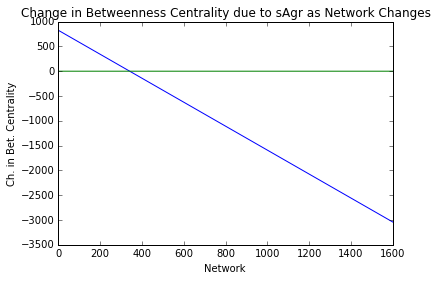

In [69]:
fig1 = plt.figure()
# Make a legend for specific lines.


y_sAgr = marginal_effects_on_betweenness_df["Chg_Betw_Centrality_from_sAgr"]
x = network_range

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(x, y_sAgr)
l2, = plt.plot(np.zeros(len(x)))
#l2, l3 = plt.plot(x, np.sin(2 * np.pi * x), '--go', x, np.log(1 + y), '.')
#l4, = plt.plot(x, np.exp(-x) * np.sin(2 * np.pi * x), 'rs-.')

plt.xlabel('Network')
plt.ylabel('Ch. in Bet. Centrality')
plt.title('Change in Betweenness Centrality due to sAgr as Network Changes')


In [ ]:
X_big5_and_network.describe()

# Reflection on results

We find the biggest 

Neuroticism and Openess Cobined -- Tend to greatly inccrease

Extroversion & Conscientiousnes Combined --- interesting that in one version the effect is positive, but too much extroversion and conscientiousness leads to negative effect. 

Aggreableness -- Tends to increase the value...but why to the 4th power?

What's with the (Aggreableness + Openness) combo and why do they tend to make negative results?

### Step 4: Against the CV set, compare the cost functions for each of the models and choose which model is the best (predict... and then get the difference) + ALso compare the adjusted R squared for all of them

### Step 5: Once the model is chosen, retrain that model using the combination of CV + Training

### Step 6: Test your final model against your test set.

In [ ]:
Diagnostic Tool #1:

https://theclevermachine.files.wordpress.com/2013/04/bias-variance-train-test-error.png

In [ ]:
Diagnostic Tool #2
### Step 7 - If you increase the size of your training set (from 0 to the full amount)
http://www.bigdataexaminer.com/wp-content/uploads/2014/11/code-9.png

# Analysis & Interpretations

# Next Steps

In [ ]:
Add sentiment analysis stuff
# Create Repository called luther (?)

# Extract out #auth & status updates

# Generate some "word usage" variable per person (collapse all statuses into a single metric per person)

# Add that metric to your model
# See if that's representative for the centrality metrics.

In [ ]:
#) Identify the profile for the "lowest" network users based on profile. and highest -- display the two types of profiles created.

In [ ]:
Next Steps:
    - K means of dataset/users / networks
    - Sentiment analysis as an additional feature (word2vec?)
    - Considering alternate network theory variables (e.g. centrality, etc...)

In [ ]:
import graphlab as gl

In [ ]:
#df = pandas.DataFrame()
sf_grouped = gl.SFrame(data=df_grouped)

In [ ]:
sf_grouped

In [ ]:
8399.66/86.33

In [ ]:
8096.6/92.24

In [ ]:
18123.1 / 97.81 

In [ ]:
sf_grouped.show()

In [ ]:
gl.canvas.show()